# Logistic Regression with SUSY
Today, you'll be a physicist, working with collider data to make new particle discoveries! You've been given a small subset of the SUSY Data Set, which contains the results of a simulated experiment to detect supersymmetric particles.

First, let's start off with the necessary imports.

In [1]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Next, we will read in the data and split into training and validation sets.

In [2]:
with open("SUSY_small.csv", "r") as f:
    read = csv.reader(f, delimiter=",")
    x = list(read)
data = np.array([[float(x[i][j]) for j in range(len(x[0]))] for i in range(len(x))])

In [3]:
shuffle = np.arange(data.shape[0])
np.random.shuffle(shuffle)
data_train = data[shuffle[:-1000],:]
data_val = data[shuffle[-1000:],:]
X_train, Y_train = data_train[:,1:], data_train[:,0]
X_val, Y_val = data_val[:,1:], data_val[:,0]

print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(4112, 18) (1000, 18) (4112,) (1000,)


Let's now implement the functions needed to perform gradient descent.

In [4]:
def sigmoid(X, w):
    """
    Compute the elementwise sigmoid of the product Xw
    Data in X should be rows, weights are a column. 
    """
    return 1 / (1 + np.exp(-np.dot(X,w)))

def gradient(X, y, w, onept=False, norm=None, lamb=0):
    """
    Compute gradient of regularized loss function. 
    Accomodate for if X is just one data point. 
    """
    grad = 0
    
    if norm == 'l1':
        grad += lamb * np.sign(w)
    if norm == 'l2':
        grad += 2 * lamb * w
    if onept:
        grad += -((y - sigmoid(X, w)) * X).reshape(w.size, 1)
    else:
        grad += -np.dot(X.T, y - sigmoid(X,w)) / y.size
    return grad

def loss(X, y, w, norm=None, lamb=0):
    """
    Compute total loss for the data in X, labels in y, params w
    """
    sumcost = 0
    for i in range(X.shape[0]):
        sumcost += y[i] * np.log(sigmoid(X[i], w)) + (1-y[i]) * np.log(1-sigmoid(X[i], w))
    normcost = 0
    if norm == 'l1':
        normcost = lamb * np.sum(np.abs(w))
    if norm == 'l2':
        normcost = lamb * np.linalg.norm(w)**2
    return normcost - sumcost / y.size

def accuracy(X, y, w):
    """
    Compute accuracy for data in X, labels in y, params w
    """
    results = np.round(sigmoid(X,w))
    score = sum([results[i] == y[i] for i in range(y.size)]) / y.size
    return score

Now that we have the needed functions, we can perform gradient descent to train the model.

In [5]:
theta = np.random.normal(0, 0.1, X_train.shape[1])
losses = []
train_accuracies = []
validation_accuracies = []
epsilon = 0.05
num_iterations = 300

for i in range(num_iterations):
    diff = epsilon * gradient(X_train, Y_train, theta)
    theta = theta - diff
    losses.append(loss(X_train, Y_train, theta))
    train_accuracies.append(accuracy(X_train, Y_train, theta))
    validation_accuracies.append(accuracy(X_val, Y_val, theta))

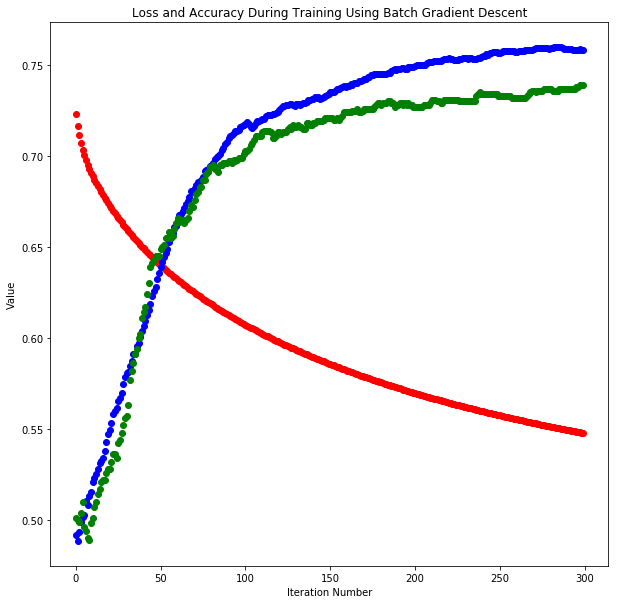

0.7585116731517509


In [6]:
plt.figure(figsize=[10,10])
plt.plot(np.arange(num_iterations), losses, 'ro')
plt.plot(np.arange(num_iterations), train_accuracies, 'bo')
plt.plot(np.arange(num_iterations), validation_accuracies, 'go')
plt.title('Loss and Accuracy During Training Using Batch Gradient Descent')
plt.ylabel('Value')
plt.xlabel('Iteration Number')
plt.show()
print(accuracy(X_train, Y_train, theta))

In [8]:
print(accuracy(X_val, Y_val, theta))

0.739


# Logistic Regression with Regularization
What happens when our model overfits? Let's see what we can do to improve our validation accuracy.

In [9]:
X_train_small, Y_train_small = data_train[:50,1:], data_train[:50,0]

In [14]:
theta = np.random.normal(0, 0.1, X_train_small.shape[1])
losses = []
train_accuracies = []
validation_accuracies = []
epsilon = 0.05
num_iterations = 500
norms=["l1","l2"]
lambdas=[0,0.001,0.01,0.1,1,10]

for norm in norms:
    print(norm)
    for lamb in lambdas:
        print(lamb)
        theta = np.random.normal(0, 0.1, X_train_small.shape[1])
        for i in range(num_iterations):
            diff = epsilon*gradient(X_train_small, Y_train_small, theta, norm=norm, lamb=lamb)
            theta=theta-diff
            train_acc=accuracy(X_train_small, Y_train_small, theta)
            val_acc = accuracy(X_val, Y_val, theta)
            print(lamb)
            print("Training: " +str(train_acc)+", Validation: " + str(val_acc))
            print()

l1
0
0
Training: 0.5, Validation: 0.52

0
Training: 0.5, Validation: 0.518

0
Training: 0.5, Validation: 0.523

0
Training: 0.48, Validation: 0.535

0
Training: 0.52, Validation: 0.532

0
Training: 0.52, Validation: 0.53

0
Training: 0.52, Validation: 0.535

0
Training: 0.52, Validation: 0.532

0
Training: 0.5, Validation: 0.533

0
Training: 0.5, Validation: 0.534

0
Training: 0.5, Validation: 0.529

0
Training: 0.5, Validation: 0.532

0
Training: 0.5, Validation: 0.531

0
Training: 0.5, Validation: 0.53

0
Training: 0.5, Validation: 0.529

0
Training: 0.5, Validation: 0.53

0
Training: 0.5, Validation: 0.531

0
Training: 0.5, Validation: 0.533

0
Training: 0.52, Validation: 0.532

0
Training: 0.52, Validation: 0.533

0
Training: 0.54, Validation: 0.533

0
Training: 0.54, Validation: 0.536

0
Training: 0.54, Validation: 0.539

0
Training: 0.54, Validation: 0.537

0
Training: 0.54, Validation: 0.538

0
Training: 0.56, Validation: 0.54

0
Training: 0.56, Validation: 0.542

0
Training: 0.

0
Training: 0.8, Validation: 0.601

0
Training: 0.8, Validation: 0.602

0
Training: 0.8, Validation: 0.603

0
Training: 0.8, Validation: 0.603

0
Training: 0.8, Validation: 0.604

0
Training: 0.8, Validation: 0.604

0
Training: 0.8, Validation: 0.604

0
Training: 0.8, Validation: 0.604

0
Training: 0.8, Validation: 0.604

0
Training: 0.8, Validation: 0.604

0
Training: 0.82, Validation: 0.604

0
Training: 0.82, Validation: 0.604

0
Training: 0.82, Validation: 0.605

0
Training: 0.82, Validation: 0.605

0
Training: 0.82, Validation: 0.606

0
Training: 0.82, Validation: 0.607

0
Training: 0.82, Validation: 0.607

0
Training: 0.82, Validation: 0.608

0
Training: 0.82, Validation: 0.608

0
Training: 0.82, Validation: 0.609

0
Training: 0.82, Validation: 0.609

0
Training: 0.82, Validation: 0.609

0
Training: 0.82, Validation: 0.61

0
Training: 0.82, Validation: 0.61

0
Training: 0.82, Validation: 0.612

0
Training: 0.82, Validation: 0.613

0
Training: 0.82, Validation: 0.615

0
Training: 0

0
Training: 0.82, Validation: 0.63

0
Training: 0.82, Validation: 0.63

0
Training: 0.82, Validation: 0.63

0
Training: 0.82, Validation: 0.628

0
Training: 0.82, Validation: 0.628

0
Training: 0.82, Validation: 0.628

0
Training: 0.82, Validation: 0.629

0
Training: 0.82, Validation: 0.629

0
Training: 0.82, Validation: 0.629

0
Training: 0.82, Validation: 0.629

0
Training: 0.82, Validation: 0.629

0
Training: 0.82, Validation: 0.629

0
Training: 0.82, Validation: 0.629

0
Training: 0.82, Validation: 0.629

0
Training: 0.82, Validation: 0.629

0
Training: 0.82, Validation: 0.629

0
Training: 0.82, Validation: 0.629

0
Training: 0.82, Validation: 0.628

0
Training: 0.82, Validation: 0.628

0
Training: 0.82, Validation: 0.628

0
Training: 0.82, Validation: 0.628

0
Training: 0.82, Validation: 0.628

0
Training: 0.82, Validation: 0.628

0
Training: 0.82, Validation: 0.63

0
Training: 0.82, Validation: 0.631

0
Training: 0.82, Validation: 0.631

0
Training: 0.82, Validation: 0.631

0
Tra

0.001
Training: 0.76, Validation: 0.61

0.001
Training: 0.76, Validation: 0.61

0.001
Training: 0.76, Validation: 0.61

0.001
Training: 0.78, Validation: 0.611

0.001
Training: 0.78, Validation: 0.611

0.001
Training: 0.78, Validation: 0.61

0.001
Training: 0.78, Validation: 0.611

0.001
Training: 0.78, Validation: 0.611

0.001
Training: 0.78, Validation: 0.612

0.001
Training: 0.78, Validation: 0.611

0.001
Training: 0.78, Validation: 0.611

0.001
Training: 0.78, Validation: 0.61

0.001
Training: 0.78, Validation: 0.608

0.001
Training: 0.78, Validation: 0.608

0.001
Training: 0.78, Validation: 0.608

0.001
Training: 0.78, Validation: 0.608

0.001
Training: 0.78, Validation: 0.609

0.001
Training: 0.78, Validation: 0.609

0.001
Training: 0.78, Validation: 0.609

0.001
Training: 0.78, Validation: 0.609

0.001
Training: 0.78, Validation: 0.61

0.001
Training: 0.78, Validation: 0.61

0.001
Training: 0.78, Validation: 0.609

0.001
Training: 0.78, Validation: 0.609

0.001
Training: 0.78, V

0.001
Training: 0.82, Validation: 0.63

0.001
Training: 0.82, Validation: 0.63

0.001
Training: 0.82, Validation: 0.63

0.001
Training: 0.82, Validation: 0.63

0.001
Training: 0.82, Validation: 0.631

0.001
Training: 0.82, Validation: 0.631

0.001
Training: 0.82, Validation: 0.631

0.001
Training: 0.82, Validation: 0.631

0.001
Training: 0.82, Validation: 0.631

0.001
Training: 0.82, Validation: 0.631

0.001
Training: 0.82, Validation: 0.631

0.001
Training: 0.82, Validation: 0.631

0.001
Training: 0.82, Validation: 0.631

0.001
Training: 0.82, Validation: 0.631

0.001
Training: 0.82, Validation: 0.63

0.001
Training: 0.82, Validation: 0.631

0.001
Training: 0.82, Validation: 0.632

0.001
Training: 0.82, Validation: 0.632

0.001
Training: 0.82, Validation: 0.632

0.001
Training: 0.82, Validation: 0.632

0.001
Training: 0.82, Validation: 0.632

0.001
Training: 0.82, Validation: 0.632

0.001
Training: 0.82, Validation: 0.633

0.001
Training: 0.82, Validation: 0.634

0.001
Training: 0.82,

0.01
Training: 0.76, Validation: 0.58

0.01
Training: 0.76, Validation: 0.581

0.01
Training: 0.76, Validation: 0.58

0.01
Training: 0.76, Validation: 0.581

0.01
Training: 0.76, Validation: 0.579

0.01
Training: 0.76, Validation: 0.579

0.01
Training: 0.76, Validation: 0.579

0.01
Training: 0.76, Validation: 0.578

0.01
Training: 0.76, Validation: 0.58

0.01
Training: 0.76, Validation: 0.58

0.01
Training: 0.76, Validation: 0.581

0.01
Training: 0.76, Validation: 0.579

0.01
Training: 0.76, Validation: 0.582

0.01
Training: 0.76, Validation: 0.58

0.01
Training: 0.76, Validation: 0.579

0.01
Training: 0.76, Validation: 0.58

0.01
Training: 0.76, Validation: 0.58

0.01
Training: 0.76, Validation: 0.58

0.01
Training: 0.78, Validation: 0.58

0.01
Training: 0.78, Validation: 0.58

0.01
Training: 0.78, Validation: 0.579

0.01
Training: 0.78, Validation: 0.578

0.01
Training: 0.78, Validation: 0.578

0.01
Training: 0.78, Validation: 0.577

0.01
Training: 0.78, Validation: 0.578

0.01
Train

0.01
Training: 0.82, Validation: 0.61

0.01
Training: 0.82, Validation: 0.611

0.01
Training: 0.82, Validation: 0.612

0.01
Training: 0.82, Validation: 0.612

0.01
Training: 0.82, Validation: 0.612

0.01
Training: 0.82, Validation: 0.612

0.01
Training: 0.82, Validation: 0.612

0.01
Training: 0.82, Validation: 0.612

0.01
Training: 0.82, Validation: 0.612

0.01
Training: 0.82, Validation: 0.612

0.01
Training: 0.82, Validation: 0.613

0.01
Training: 0.82, Validation: 0.613

0.01
Training: 0.82, Validation: 0.613

0.01
Training: 0.82, Validation: 0.615

0.01
Training: 0.82, Validation: 0.615

0.01
Training: 0.82, Validation: 0.616

0.01
Training: 0.82, Validation: 0.615

0.01
Training: 0.82, Validation: 0.616

0.01
Training: 0.82, Validation: 0.616

0.01
Training: 0.82, Validation: 0.617

0.01
Training: 0.82, Validation: 0.617

0.01
Training: 0.82, Validation: 0.617

0.01
Training: 0.82, Validation: 0.617

0.01
Training: 0.82, Validation: 0.617

0.01
Training: 0.82, Validation: 0.618

0

0.1
Training: 0.54, Validation: 0.472

0.1
Training: 0.52, Validation: 0.464

0.1
Training: 0.52, Validation: 0.472

0.1
Training: 0.52, Validation: 0.46

0.1
Training: 0.52, Validation: 0.462

0.1
Training: 0.52, Validation: 0.46

0.1
Training: 0.52, Validation: 0.461

0.1
Training: 0.52, Validation: 0.46

0.1
Training: 0.52, Validation: 0.461

0.1
Training: 0.52, Validation: 0.458

0.1
Training: 0.52, Validation: 0.461

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.46

0.1
Training: 0.52, Validation: 0.459

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validatio

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.458

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.459

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.459

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.458

0.1
Training: 0.52, Validation: 0.458

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.46

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.458

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.458

0.1
Training: 0.52, Validation: 0.46

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validat

0.1
Training: 0.52, Validation: 0.459

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.458

0.1
Training: 0.52, Validation: 0.458

0.1
Training: 0.52, Validation: 0.458

0.1
Training: 0.52, Validation: 0.458

0.1
Training: 0.52, Validation: 0.458

0.1
Training: 0.52, Validation: 0.457

0.1
Training: 0.52, Validation: 0.458

1
1
Training: 0.48, Validation: 0.486

1
Training: 0.44, Validation: 0.46

1
Training: 0.52, Validation: 0.458

1
Training: 0.48, Validation: 0.551

1
Training: 0.5, Validation: 0.463

1
Training: 0.42, Validation: 0.503

1
Training: 0.5, Validation: 0.473

1
Training: 0.56, Validation: 0.51

1
Training: 0.56, Validation: 0.508

1
Training: 0.58, Validation: 0.481

1
Training: 0.48, Validation: 0.429

1
Training: 0.58, Validation: 0.487

1
Training: 

1
Training: 0.54, Validation: 0.505

1
Training: 0.58, Validation: 0.491

1
Training: 0.56, Validation: 0.482

1
Training: 0.54, Validation: 0.504

1
Training: 0.58, Validation: 0.531

1
Training: 0.48, Validation: 0.502

1
Training: 0.56, Validation: 0.52

1
Training: 0.48, Validation: 0.533

1
Training: 0.48, Validation: 0.5

1
Training: 0.46, Validation: 0.48

1
Training: 0.48, Validation: 0.468

1
Training: 0.46, Validation: 0.486

1
Training: 0.52, Validation: 0.459

1
Training: 0.46, Validation: 0.547

1
Training: 0.52, Validation: 0.459

1
Training: 0.5, Validation: 0.523

1
Training: 0.48, Validation: 0.408

1
Training: 0.52, Validation: 0.522

1
Training: 0.48, Validation: 0.533

1
Training: 0.52, Validation: 0.463

1
Training: 0.54, Validation: 0.505

1
Training: 0.52, Validation: 0.461

1
Training: 0.58, Validation: 0.471

1
Training: 0.52, Validation: 0.459

1
Training: 0.46, Validation: 0.44

1
Training: 0.44, Validation: 0.511

1
Training: 0.52, Validation: 0.451

1
Train

1
Training: 0.54, Validation: 0.485

1
Training: 0.52, Validation: 0.489

1
Training: 0.4, Validation: 0.403

1
Training: 0.52, Validation: 0.467

1
Training: 0.48, Validation: 0.456

1
Training: 0.56, Validation: 0.535

1
Training: 0.64, Validation: 0.495

1
Training: 0.52, Validation: 0.502

1
Training: 0.48, Validation: 0.526

1
Training: 0.48, Validation: 0.524

1
Training: 0.52, Validation: 0.527

1
Training: 0.56, Validation: 0.526

1
Training: 0.52, Validation: 0.508

1
Training: 0.48, Validation: 0.545

1
Training: 0.44, Validation: 0.513

1
Training: 0.52, Validation: 0.478

1
Training: 0.52, Validation: 0.464

1
Training: 0.5, Validation: 0.481

1
Training: 0.52, Validation: 0.528

1
Training: 0.54, Validation: 0.458

1
Training: 0.42, Validation: 0.473

1
Training: 0.52, Validation: 0.469

1
Training: 0.46, Validation: 0.519

1
Training: 0.52, Validation: 0.571

1
Training: 0.62, Validation: 0.576

1
Training: 0.42, Validation: 0.482

1
Training: 0.54, Validation: 0.492

1
T

10
Training: 0.5, Validation: 0.464

10
Training: 0.56, Validation: 0.6

10
Training: 0.5, Validation: 0.468

10
Training: 0.58, Validation: 0.6

10
Training: 0.5, Validation: 0.469

10
Training: 0.58, Validation: 0.603

10
Training: 0.5, Validation: 0.468

10
Training: 0.58, Validation: 0.607

10
Training: 0.5, Validation: 0.468

10
Training: 0.58, Validation: 0.61

10
Training: 0.5, Validation: 0.469

10
Training: 0.5, Validation: 0.563

10
Training: 0.52, Validation: 0.47

10
Training: 0.52, Validation: 0.571

10
Training: 0.52, Validation: 0.472

10
Training: 0.52, Validation: 0.575

10
Training: 0.52, Validation: 0.458

10
Training: 0.52, Validation: 0.578

10
Training: 0.52, Validation: 0.458

10
Training: 0.54, Validation: 0.578

10
Training: 0.52, Validation: 0.459

10
Training: 0.56, Validation: 0.578

10
Training: 0.52, Validation: 0.443

10
Training: 0.56, Validation: 0.582

10
Training: 0.5, Validation: 0.445

10
Training: 0.56, Validation: 0.588

10
Training: 0.5, Validati

10
Training: 0.46, Validation: 0.493

10
Training: 0.52, Validation: 0.489

10
Training: 0.48, Validation: 0.488

10
Training: 0.54, Validation: 0.509

10
Training: 0.5, Validation: 0.524

10
Training: 0.54, Validation: 0.519

10
Training: 0.48, Validation: 0.525

10
Training: 0.54, Validation: 0.519

10
Training: 0.52, Validation: 0.517

10
Training: 0.56, Validation: 0.523

10
Training: 0.52, Validation: 0.517

10
Training: 0.56, Validation: 0.51

10
Training: 0.54, Validation: 0.524

10
Training: 0.56, Validation: 0.509

10
Training: 0.52, Validation: 0.522

10
Training: 0.58, Validation: 0.501

10
Training: 0.54, Validation: 0.526

10
Training: 0.56, Validation: 0.504

10
Training: 0.54, Validation: 0.527

10
Training: 0.56, Validation: 0.507

10
Training: 0.54, Validation: 0.532

10
Training: 0.58, Validation: 0.509

10
Training: 0.44, Validation: 0.493

10
Training: 0.52, Validation: 0.501

10
Training: 0.42, Validation: 0.483

10
Training: 0.54, Validation: 0.496

10
Training: 0

0
Training: 0.74, Validation: 0.578

0
Training: 0.74, Validation: 0.579

0
Training: 0.74, Validation: 0.578

0
Training: 0.74, Validation: 0.579

0
Training: 0.74, Validation: 0.578

0
Training: 0.74, Validation: 0.578

0
Training: 0.74, Validation: 0.579

0
Training: 0.74, Validation: 0.579

0
Training: 0.74, Validation: 0.578

0
Training: 0.74, Validation: 0.578

0
Training: 0.74, Validation: 0.577

0
Training: 0.74, Validation: 0.578

0
Training: 0.74, Validation: 0.577

0
Training: 0.74, Validation: 0.576

0
Training: 0.74, Validation: 0.577

0
Training: 0.74, Validation: 0.577

0
Training: 0.74, Validation: 0.578

0
Training: 0.74, Validation: 0.578

0
Training: 0.74, Validation: 0.578

0
Training: 0.74, Validation: 0.579

0
Training: 0.74, Validation: 0.58

0
Training: 0.74, Validation: 0.581

0
Training: 0.74, Validation: 0.581

0
Training: 0.74, Validation: 0.581

0
Training: 0.74, Validation: 0.58

0
Training: 0.74, Validation: 0.58

0
Training: 0.74, Validation: 0.58

0
Tra

0
Training: 0.8, Validation: 0.624

0
Training: 0.8, Validation: 0.625

0
Training: 0.8, Validation: 0.625

0
Training: 0.8, Validation: 0.626

0
Training: 0.8, Validation: 0.626

0
Training: 0.8, Validation: 0.626

0
Training: 0.8, Validation: 0.626

0
Training: 0.8, Validation: 0.626

0
Training: 0.8, Validation: 0.626

0
Training: 0.8, Validation: 0.628

0
Training: 0.8, Validation: 0.628

0
Training: 0.8, Validation: 0.628

0
Training: 0.8, Validation: 0.628

0
Training: 0.8, Validation: 0.628

0
Training: 0.8, Validation: 0.628

0
Training: 0.8, Validation: 0.628

0
Training: 0.8, Validation: 0.628

0
Training: 0.8, Validation: 0.628

0
Training: 0.8, Validation: 0.627

0
Training: 0.8, Validation: 0.626

0
Training: 0.8, Validation: 0.626

0
Training: 0.8, Validation: 0.626

0
Training: 0.8, Validation: 0.626

0
Training: 0.8, Validation: 0.626

0
Training: 0.8, Validation: 0.626

0
Training: 0.8, Validation: 0.627

0
Training: 0.8, Validation: 0.627

0
Training: 0.8, Validation:

0.001
Training: 0.72, Validation: 0.574

0.001
Training: 0.72, Validation: 0.576

0.001
Training: 0.72, Validation: 0.577

0.001
Training: 0.72, Validation: 0.576

0.001
Training: 0.72, Validation: 0.577

0.001
Training: 0.72, Validation: 0.577

0.001
Training: 0.72, Validation: 0.576

0.001
Training: 0.72, Validation: 0.577

0.001
Training: 0.72, Validation: 0.577

0.001
Training: 0.72, Validation: 0.577

0.001
Training: 0.72, Validation: 0.577

0.001
Training: 0.72, Validation: 0.578

0.001
Training: 0.72, Validation: 0.578

0.001
Training: 0.72, Validation: 0.579

0.001
Training: 0.72, Validation: 0.579

0.001
Training: 0.72, Validation: 0.578

0.001
Training: 0.72, Validation: 0.579

0.001
Training: 0.72, Validation: 0.579

0.001
Training: 0.72, Validation: 0.579

0.001
Training: 0.72, Validation: 0.578

0.001
Training: 0.72, Validation: 0.578

0.001
Training: 0.72, Validation: 0.578

0.001
Training: 0.72, Validation: 0.578

0.001
Training: 0.72, Validation: 0.577

0.001
Training: 

0.001
Training: 0.8, Validation: 0.619

0.001
Training: 0.8, Validation: 0.619

0.001
Training: 0.8, Validation: 0.62

0.001
Training: 0.8, Validation: 0.62

0.001
Training: 0.8, Validation: 0.621

0.001
Training: 0.8, Validation: 0.622

0.001
Training: 0.8, Validation: 0.623

0.001
Training: 0.8, Validation: 0.623

0.001
Training: 0.8, Validation: 0.623

0.001
Training: 0.8, Validation: 0.624

0.001
Training: 0.8, Validation: 0.625

0.001
Training: 0.8, Validation: 0.625

0.001
Training: 0.8, Validation: 0.626

0.001
Training: 0.8, Validation: 0.626

0.001
Training: 0.8, Validation: 0.626

0.001
Training: 0.8, Validation: 0.626

0.001
Training: 0.8, Validation: 0.625

0.001
Training: 0.8, Validation: 0.625

0.001
Training: 0.8, Validation: 0.625

0.001
Training: 0.8, Validation: 0.625

0.001
Training: 0.8, Validation: 0.625

0.001
Training: 0.8, Validation: 0.626

0.001
Training: 0.82, Validation: 0.626

0.001
Training: 0.82, Validation: 0.627

0.001
Training: 0.82, Validation: 0.627


0.01
Training: 0.56, Validation: 0.483

0.01
Training: 0.56, Validation: 0.483

0.01
Training: 0.56, Validation: 0.483

0.01
Training: 0.56, Validation: 0.484

0.01
Training: 0.58, Validation: 0.484

0.01
Training: 0.6, Validation: 0.486

0.01
Training: 0.6, Validation: 0.491

0.01
Training: 0.58, Validation: 0.492

0.01
Training: 0.58, Validation: 0.494

0.01
Training: 0.6, Validation: 0.496

0.01
Training: 0.6, Validation: 0.5

0.01
Training: 0.6, Validation: 0.505

0.01
Training: 0.6, Validation: 0.505

0.01
Training: 0.6, Validation: 0.511

0.01
Training: 0.6, Validation: 0.514

0.01
Training: 0.62, Validation: 0.515

0.01
Training: 0.62, Validation: 0.515

0.01
Training: 0.62, Validation: 0.518

0.01
Training: 0.6, Validation: 0.518

0.01
Training: 0.6, Validation: 0.517

0.01
Training: 0.6, Validation: 0.522

0.01
Training: 0.6, Validation: 0.523

0.01
Training: 0.6, Validation: 0.525

0.01
Training: 0.6, Validation: 0.527

0.01
Training: 0.62, Validation: 0.53

0.01
Training: 0.

0.01
Training: 0.78, Validation: 0.605

0.01
Training: 0.78, Validation: 0.605

0.01
Training: 0.78, Validation: 0.606

0.01
Training: 0.78, Validation: 0.606

0.01
Training: 0.78, Validation: 0.605

0.01
Training: 0.78, Validation: 0.605

0.01
Training: 0.78, Validation: 0.605

0.01
Training: 0.78, Validation: 0.605

0.01
Training: 0.78, Validation: 0.605

0.01
Training: 0.78, Validation: 0.605

0.01
Training: 0.78, Validation: 0.604

0.01
Training: 0.78, Validation: 0.604

0.01
Training: 0.78, Validation: 0.604

0.01
Training: 0.78, Validation: 0.604

0.01
Training: 0.78, Validation: 0.605

0.01
Training: 0.78, Validation: 0.605

0.01
Training: 0.78, Validation: 0.605

0.01
Training: 0.78, Validation: 0.605

0.01
Training: 0.78, Validation: 0.605

0.01
Training: 0.78, Validation: 0.607

0.01
Training: 0.78, Validation: 0.607

0.01
Training: 0.78, Validation: 0.606

0.01
Training: 0.78, Validation: 0.606

0.01
Training: 0.78, Validation: 0.606

0.01
Training: 0.78, Validation: 0.606



0.01
Training: 0.82, Validation: 0.634

0.01
Training: 0.82, Validation: 0.634

0.01
Training: 0.82, Validation: 0.634

0.01
Training: 0.82, Validation: 0.634

0.01
Training: 0.82, Validation: 0.634

0.01
Training: 0.82, Validation: 0.633

0.01
Training: 0.82, Validation: 0.633

0.01
Training: 0.82, Validation: 0.633

0.01
Training: 0.82, Validation: 0.633

0.01
Training: 0.82, Validation: 0.633

0.01
Training: 0.82, Validation: 0.633

0.01
Training: 0.82, Validation: 0.633

0.01
Training: 0.82, Validation: 0.634

0.01
Training: 0.82, Validation: 0.634

0.01
Training: 0.82, Validation: 0.634

0.01
Training: 0.82, Validation: 0.634

0.01
Training: 0.82, Validation: 0.634

0.01
Training: 0.82, Validation: 0.634

0.01
Training: 0.82, Validation: 0.634

0.01
Training: 0.82, Validation: 0.634

0.01
Training: 0.82, Validation: 0.634

0.01
Training: 0.82, Validation: 0.634

0.01
Training: 0.82, Validation: 0.633

0.01
Training: 0.82, Validation: 0.633

0.01
Training: 0.82, Validation: 0.633



0.1
Training: 0.74, Validation: 0.574

0.1
Training: 0.76, Validation: 0.574

0.1
Training: 0.76, Validation: 0.575

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Validation: 0.576

0.1
Training: 0.76, Valid

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training: 0.74, Validation: 0.58

0.1
Training

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1
Training: 0.52, Validation: 0.472

1

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training:

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training: 0.52, Validation: 0.457

10
Training:

ValueError: x and y must have same first dimension, but have shapes (500,) and (0,)

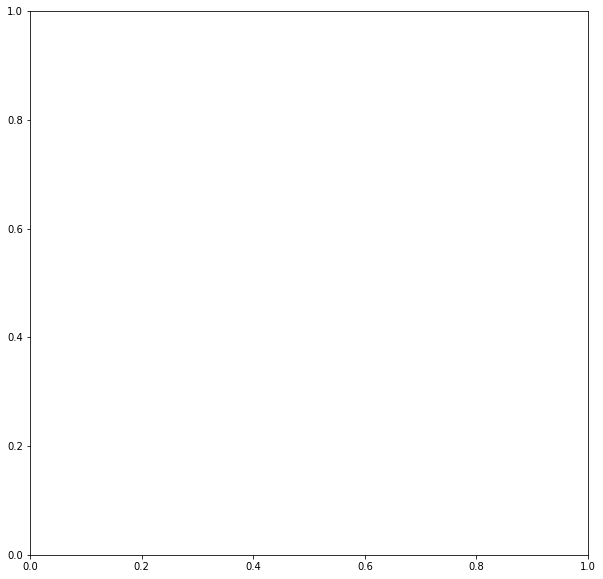

In [11]:
plt.figure(figsize=[10,10])
plt.plot(np.arange(num_iterations), losses, 'ro')
plt.plot(np.arange(num_iterations), train_accuracies, 'bo')
plt.plot(np.arange(num_iterations), validation_accuracies, 'go')
plt.title('Loss and Accuracy During Training Using Batch Gradient Descent')
plt.ylabel('Value')
plt.xlabel('Iteration Number')
plt.show()
print(accuracy(X_train_small, Y_train_small, theta))

In [ ]:
print(accuracy(X_val, Y_val, theta))

Doesn't look so good, huh? Now's lets see what we can do to improve that with regularization.
Note: We are using a relatively simple model, and so for this specific instance may not be very useful.

In [ ]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10]
norms = ['l1, 'l2'']

for norm in norms:
    print(norm)
    for lamb in lambdas:
        for i in range(num_iterations):
            pass
        print(lamb)
        print('Training: ' + train_acc + ', Validation: ' + val_acc)
        print()

To see what kind of effect regularization is having on the weights, train the model with varying norms and lambdas and print out the parameters.

In [ ]:
print(theta)